## Simple example of TuRBO-1

In [1]:
cd ..

/home/mattyshen/NNTuRBO


In [2]:
from turbo import Turbo1
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

## Set up an optimization problem class

In [3]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

## Create a Turbo optimizer instance

In [4]:
turbo1 = Turbo1(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=20,  # Number of initial bounds from an Latin hypercube design
    max_evals = 1000,  # Maximum number of evaluations
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cpu",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
    prop=1.2,
    p=2
)

Using dtype = torch.float64 
Using device = cpu


# Run the optimization process

In [5]:
turbo1.optimize()

Starting from fbest = 32.12
k: 1000
30) New best: 20.89
k: 1000
k: 833
50) New best: 14.72
k: 833
k: 694
70) New best: 12.71
k: 694
k: 578
k: 481
k: 400
k: 333
120) New best: 6.318
k: 333
130) New best: 6.253
k: 333
k: 277
k: 230
k: 191
170) New best: 5.553
k: 191
k: 159
190) New best: 5.067
k: 159
k: 132
k: 110
220) New best: 4.469
k: 110
230) New best: 3.845
k: 110
k: 91
k: 75
260) New best: 3.842
k: 62
270) New best: 3.765
k: 62
280) New best: 3.588
k: 62
k: 51
300) New best: 3.52
k: 51
310) New best: 3.4
k: 51
320) Restarting with fbest = 3.4
Starting from fbest = 26.09
k: 1000
k: 1000
k: 833
k: 833
k: 694
k: 578
k: 481
k: 400
k: 400
430) New best: 2.752
k: 400
440) New best: 2.167
k: 480
k: 400
k: 333
470) New best: 1.833
k: 333
k: 277
k: 230
k: 191
510) New best: 1.739
k: 191
520) New best: 1.11
k: 191
k: 159
k: 132
k: 110
560) New best: 0.7997
k: 110
570) New best: 0.761
k: 110
k: 91
590) New best: 0.4525
k: 91
k: 75
k: 62
620) New best: 0.4013
k: 62
630) New best: 0.3099
k: 62


## Extract all evaluations from Turbo and print the best

In [6]:
X = turbo1.X  # Evaluated points
fX = turbo1.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

Best value found:
	f(x) = 0.196
Observed at:
	x = [9.155 1.102 0.345 0.927 1.045 1.015 0.938 0.571 0.747 1.261]


## Plot the progress
Each trust region is independent and finds different solutions

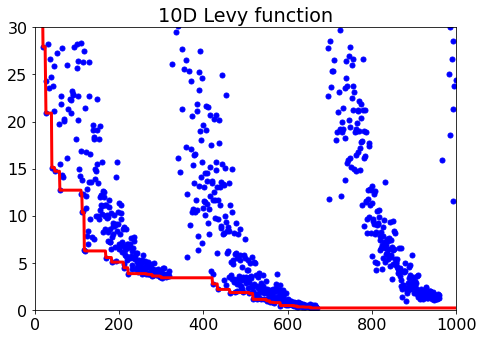

In [7]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()